# Approximation Confirmation Experiment
## In this notebook, we aim to confirm experimentally  the following proposition:

Proposition 2.1. Suppose $g:\mathbb{R} \rightarrow \mathbb{R}$  is K-Lipschitz. For any $\epsilon > 0$, there exists a 2-layer network $f$ with $\lceil \frac{K}{\epsilon} \rceil$ threshold nodes so that $\sup{x\in[0,1]}|f(x)-g(x)| < \epsilon.$




In [272]:
#Import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [273]:
#Define epsilon, K (determined by funciton g(x) = x^2), and M
#Vary value of epsilon and run all
epsilon = 0.1
K = 2
M = int(np.ceil(K/epsilon))

In [274]:
def g(x):
    return x**2

In [275]:
#M evenly spaced nodes in [0,1]
b = np.linspace(0,1,M)

#Construct matrix to calculate weights a_0 = g(b_0), a_i = g(b_i) - g(b_i-1)
diagonals = [[1]*(M),[-1]*(M-1)]
A = scipy.sparse.diags(diagonals,[0,-1])

a = A@(g(b))

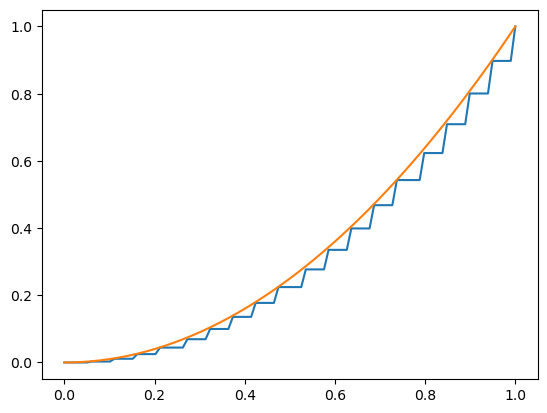

In [276]:
#Define a function f to sum weights on heaviside function sigma(x-b_i)
#Very inefficient with a double for loop. Consider ways to make this section more efficient
def f(x,a,b):
    h=np.zeros((len(x),M))
    for j in range(len(b)):
        for i, num in enumerate(x):
            if num >= b[j]:
                h[i][j] = 1
            else:
                h[i][j] = 0
  
    return (h@a)
    
#Define x vector
x = np.linspace(0,1,100)
#visualize
plt.plot(x,f(x,a,b), x, g(x))

        
        
    

In [277]:
#Quick error calculation to estimate the supremum
diff = abs(f(x,a,b)-g(x))
print(diff.max())

0.08239308499528453


In [278]:
# difference should be positive to show our supremum is less than epsilon. 
epsilon - diff.max()

0.01760691500471548